### **Limpeza dos dados**

In [0]:
import pandas as pd
import re
phones = pd.read_csv("https://raw.githubusercontent.com/Alecsandros/Smartphones/dataset/phone_dataset.csv")

In [0]:
### DELETANDO COLUNAS NÃO DESEJADAS E RENOMEANDO

#Desnecessários
phones = phones.drop("2G_bands", axis=1) 
phones = phones.drop("status", axis=1)
phones = phones.drop("weight_oz", axis=1)
phones = phones.drop("colors", axis=1)
phones = phones.drop("radio", axis=1)
phones = phones.drop("SIM", axis=1)

#Faltantes
phones = phones.drop("network_speed", axis=1) 
phones = phones.drop("GPU", axis=1)
phones = phones.drop("NFC", axis=1)
phones = phones.drop("USB", axis=1)

#Outros
phones = phones.drop("RAM", axis=1)

phones = phones.rename(columns={'4G_bands': '4G', '3G_bands': '3G', 'network_technology': 'network', 'weight_g': 'weight', 'loud_speaker': 'speaker', 'WLAN': 'WIFI'})

In [0]:
##3 RESOLUTION E PPI

#Separando display size em resolution e ppi:
#Transforma display_size em string e divide ele por uma expressão
phones['display_size'] = phones['display_size'].astype('str')
displayInfo = phones["display_size"].str.split("\(~", n = 1, expand = True) 

#Agora atribui cada um a sua coluna
phones['display_size'] = displayInfo[0]
phones['ppi'] = displayInfo[1]

#Tratando missing values
phones['display_size'] = phones['display_size'].apply(lambda x: 'missing' if 'nan' in str(x) else x)

#Renomeando display_size para resolution
phones['display_size'] = phones['display_size'].astype('category')
phones = phones.rename(columns={'display_size': 'resolution'})

#Convertendo ppi para float
phones['ppi'] = phones['ppi'].str.extract(r'([0-9]*)') 
phones['ppi'] = pd.to_numeric(phones['ppi'], errors='coerce')
phones['ppi'] = phones['ppi'].astype('float64')

In [0]:
### 4G, 3G E NETWORK

#Regex da bibioteca re importada no início
regexp = re.compile('[A-Z]')

#Transformando colunas em booleanas
phones['4G'] = phones['4G'].apply(lambda x: True if 'LTE' in str(x) else False)
phones['3G'] = phones['3G'].apply(lambda x: True if regexp.search(str(x)) else False)
phones['network'] = phones['network'].apply(lambda x: False if 'No cellular connectivity' in str(x) else True)

In [0]:
### ANNOUNCED

phones['announced'] = phones['announced'].str.extract(r'([1-3][0-9]{3})')
phones['announced'] = phones['announced'].apply(lambda x: 'missing' if 'nan' in str(x) else x)
phones['announced'] = phones['announced'].astype('category')

In [0]:
### GPRS

phones['GPRS'] = phones['GPRS'].apply(lambda x: False if 'No' in str(x) else ('missing' if 'nan' in str(x) else True))

In [0]:
### EDGE

phones['EDGE'] = phones['EDGE'].apply(lambda x: False if 'No' in str(x) else ('missing' if 'nan' in str(x) else True))

In [0]:
### DIMENTIONS (depth)

phones['dimentions'] = phones['dimentions'].astype('str')

#Extrai depth a partir de dimentions
phones['depth'] = phones['dimentions'].str.extract(r'([0-9]*[.]*[0-9]* mm)') 

#Restringe apenas para número
phones["depth"] = phones["depth"].str.extract(r'([0-9]*[.]*[0-9]*)')
phones["depth"] = pd.to_numeric(phones["depth"], errors='coerce')

#Converte a coluna para float
phones['depth'] = phones['depth'].astype('float64')

In [0]:
### DIMENTIONS (width, height)

phones['dimentions'] = phones['dimentions'].astype('str')

#dimentions agora contém a substring responsável por width e height
phones['dimentions'] =  phones['dimentions'].str.extract(r'([0-9]*[.]*[0-9]* x *[0-9]*[.]*[0-9]*)') 
  
#divide as dimensões em 2
width_height = phones['dimentions'].str.split("x", n = 1, expand = True) 

#Atribui as dimensões para cada coluna
phones['width'] = width_height[0]
phones['height'] = width_height[1]

#Converte as colunas para float
phones["width"] = pd.to_numeric(phones["width"], errors='coerce')
phones["height"] = pd.to_numeric(phones["height"], errors='coerce')
phones['width'] = phones['width'].astype('float64')
phones['height'] = phones['height'].astype('float64')

phones = phones.drop("dimentions", axis=1)

In [0]:
### WEIGHT

phones["weight"] = pd.to_numeric(phones["weight"], errors='coerce')
phones['weight'] = phones['weight'].astype('float64') 

In [0]:
### BODY_RATIO

#phones['body_ratio'] agora contém a substring de display_resolution responsável pelo screen to body ratio
phones['body_ratio'] = phones['display_resolution'].str.extract(r'(~[0-9]*[.]*[0-9]*)') 
phones['body_ratio'] = phones["body_ratio"].str.replace('~', '')

#Converte a coluna para float
phones['body_ratio'] = phones['body_ratio'].astype('float64')

In [0]:
### DISPLAY TYPE

## Pegando as cores do display pelo regex
phones['display_colors'] = phones['display_type'].str.extract(r'([0-9][0-9]*[M|K][ ]*colors)') 

#Pegando o tipo do display pelo regex
phones['display_type'] = phones['display_type'].str.extract(r'([A-Z][A-Z][A-Z]*[ ][A-Z]*[ ]*[A-Z]*)') 

In [0]:
### DISPLAY SIZE (ex resolution)

phones['display_resolution'] =   phones['display_resolution'].str.extract(r'([0-9]*[.]*[0-9]* inches)') 
phones['display_resolution'] = phones["display_resolution"].str.replace('inches', '')

#Converte a coluna para float
phones['display_resolution'] = phones['display_resolution'].astype('float64')

#Corrigindo os nomes errados
phones = phones.rename(columns={'display_resolution': 'display_size', 'resolution': 'display_resolution'}) 

In [0]:
### OS (NAME E VERSION)

phones['OS_version'] = phones['OS'].str.extract(r'(([0-9][.]*)+)')[0] 
phones['OS'] = phones['OS'].str.extract(r'(([A-z]*[ ]*)+)')[0] 

phones = phones.rename(columns={'OS': 'OS_name'})

#Tratando missing values
phones['OS_version'] = phones['OS_version'].apply(lambda x: 'missing' if 'nan' in str(x) else x)
phones['OS_name'] = phones['OS_name'].apply(lambda x: 'missing' if 'nan' in str(x) else x)

phones['OS_version'] = phones['OS_version'].astype('category') #Ver coisas de 1 != 1.0 etc
phones['OS_name'] = phones['OS_name'].astype('category')  #Ver coisas de android != android etc

In [0]:
### CHIPSET

phones['Chipset'] = phones['Chipset'].apply(lambda x: 'missing' if 'nan' in str(x) else x)

In [0]:
### SD 

#Agora é bool
phones['memory_card'] = phones['memory_card'].apply(lambda x: False if 'No' in str(x) else True)

In [0]:
### INTERNAL MEMORY

phones['internal_memory'] = phones["internal_memory"].str.replace( "((\()[ -~]*)" , "", regex=True)

#IM_MB = Internal Memory in MB - Todos os dados que tem MB no regex estão como True nessa coluna, caso ele não tenha MB ele vai ficar falso.
regexp = re.compile('([0-9]+[ -~]*(MB|KB))')
phones['IM_LT_1GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Tirando tudo que não tem GB de internal memory
phones['internal_memory'] = phones["internal_memory"].str.replace( "([0-9]+[ -~]*(MB))" , "", regex=True)
phones['internal_memory'] = phones['internal_memory'].str.extract(r'([ -~]*(GB)[ -~]*)') 

#Coluna para todos os phones acima de 120GB
regexp = re.compile('([1-9][0-9][0-9])')
phones['IM_MT_120GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Removendo todos os valores acima de 100gb
phones['internal_memory'] = phones["internal_memory"].str.replace( "([0-9][0-9][0-9])" , "", regex=True)

#Coluna para todos os phones com 64GB de memória interna
regexp = re.compile('(64)')
phones['IM_64GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Removendo todos os valores de 64GB de memória interna
phones['internal_memory'] = phones["internal_memory"].str.replace( "64" , "", regex=True)

#Coluna para todos os phones com 32GB de memória interna
regexp = re.compile('(32)')
phones['IM_32GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Removendo todos os valores de 32GB de memória interna
phones['internal_memory'] = phones["internal_memory"].str.replace( "32" , "", regex=True)

#Coluna para todos os phones com 16GB de memória interna
regexp = re.compile('(16)')
phones['IM_16GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Removendo todos os valores de 16GB de memória interna
phones['internal_memory'] = phones["internal_memory"].str.replace( "16" , "", regex=True)

#Coluna para todos os phones entre 1GB e 15GB de memória interna
regexp = re.compile('([0-1]*[0-9])')
phones['IM_1GB_15GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

phones = phones.drop("internal_memory", axis=1)

In [0]:
### RAM 

#RAM_MB = RAM in MB - Todos os dados que tem MB no regex estão como True nessa coluna, caso ele não tenha MB ele vai ficar falso.
#regexp = re.compile('([0-9]+[ -~]*(MB|KB))')
#phones['IM_LT_1GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)


In [0]:
### PRIMARY & SECONDARY CAMERA

phones['primary_camera'] = phones['primary_camera'].apply(lambda x: 0.3 if 'VGA' in str(x) else x)
phones['primary_camera'] = phones['primary_camera'].str.extract(r'([0-9]+(.)?[0-9]*)')
phones['primary_camera'] = phones['primary_camera'].apply(lambda x: 'missing' if 'nan' in str(x) else x)
phones['primary_camera'] = phones['primary_camera'].astype('category')


phones['secondary_camera'] = phones['secondary_camera'].apply(lambda x: 0.3 if 'VGA' in str(x) else x)
phones['secondary_camera'] = phones['secondary_camera'].str.extract(r'([0-9]+(.)?[0-9]*)')
phones['secondary_camera'] = phones['secondary_camera'].apply(lambda x: 'missing' if 'nan' in str(x) else x)
phones['secondary_camera'] = phones['secondary_camera'].astype('category')

In [0]:
### SPEAKER 

regexp = re.compile('(([S|s]tereo)|(dual))')
phones['stereo_speaker'] = phones['speaker'].apply(lambda x: True if regexp.search(str(x)) else False)

phones['speaker'] = phones['speaker'].apply(lambda x: True if 'Yes' in str(x) else False)

In [0]:
### AUDIO JACK

phones['audio_jack'] = phones['audio_jack'].apply(lambda x: True if 'Yes' in str(x) else ('missing' if 'nan' in str(x) else False))

In [0]:
### WIFI

regexp = re.compile('((No)|(no))')
phones['WIFI'] = phones['WIFI'].apply(lambda x: False if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else True))

In [0]:
### BLUETOOTH

phones['bluetooth'] = phones['bluetooth'].str.extract(r'(([Y|y]es)|([N|n]o)|([0-9].[0-9]))')

phones['bluetooth'] = phones['bluetooth'].apply(lambda x: 'missing' if 'nan' in str(x) else x)

phones['bluetooth'] = phones['bluetooth'].astype('category')

In [0]:
### GPS

phones['GPS'] = phones['GPS'].apply(lambda x: True if 'Yes' in str(x) else (True if 'GPS' in str(x) else ('missing' if 'nan' in str(x) else False)))

In [0]:
### BATTERY

phones['battery'] = phones['battery'].str.extract(r'([0-9]+[ ]mAh)') 
phones['battery'] = phones['battery'].str.extract(r'([0-9]+)') 

phones['battery'] = pd.to_numeric(phones['battery'], errors='coerce')
phones['battery'] = phones['battery'].astype('float64')

In [0]:
### SENSORS

#accelerometer
regexp = re.compile('([A|a]ccelerometer)')
phones['accelerometer'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

#proximity
regexp = re.compile('([p|P]roximity)')
phones['proximity'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

#compass
regexp = re.compile('([c|C]ompass)')
phones['compass'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

#gyro
regexp = re.compile('([g|G]yro)')
phones['gyro'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

#fingerprint
regexp = re.compile('([f|F]ingerprint)')
phones['fingerprint'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

phones = phones.drop("sensors", axis=1)

In [0]:
phones.dtypes

brand                   object
model                   object
network                   bool
3G                        bool
4G                        bool
GPRS                    object
EDGE                    object
announced             category
weight                 float64
display_type            object
display_size           float64
display_resolution    category
OS_name               category
CPU                     object
Chipset                 object
memory_card               bool
primary_camera        category
secondary_camera      category
speaker                   bool
audio_jack              object
WIFI                    object
bluetooth             category
GPS                     object
battery                float64
approx_price_EUR       float64
img_url                 object
Unnamed: 40            float64
ppi                    float64
depth                  float64
width                  float64
height                 float64
body_ratio             float64
display_

Ao rodar os modelos preditivos, vimos que o score estava abaixo do esperado, logo, uma ação que encontramos para melhorá-lo foi separar o dataset em categorias, pois percebemos que o mesmo contia tablets, smartphones, celulares comuns e até mesmo smartwatches. Como o ppi muda muito caso mudemos as categorias dos produtos, decidimos então pegar smartphones, pois são o foco principal do dataset, e é a categoria que mais possui linhas.

In [0]:
phones['type'] = phones['display_size'].apply(lambda x: 'Tablet' if x >= 6.4 else ('Phone' if x < 4.0 else 'Smartphone'))
phones = phones[phones['type'] =='Smartphone']
phones = phones.drop("type", axis=1)
phones.shape

(4207, 46)

### **Modelos Preditivos**

In [0]:
pip install scipy==1.2 --upgrade

     |████████████████████████████████| 26.6MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['lines.linewidth'] = 2.0

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
phones = phones.drop("Unnamed: 40", axis=1)

In [0]:
#Passando os dados para category

phones['brand'] = phones['brand'].astype('category')
phones['model'] = phones['model'].astype('category')
phones['network'] = phones['network'].astype('category')
phones['3G'] = phones['3G'].astype('category')
phones['4G'] = phones['4G'].astype('category')
phones['GPRS'] = phones['GPRS'].astype('category')
phones['EDGE'] = phones['EDGE'].astype('category')
phones['announced'] = phones['announced'].astype('category')
phones['display_type'] = phones['display_type'].astype('category')
phones['display_resolution'] = phones['display_resolution'].astype('category')
phones['OS_name'] = phones['OS_name'].astype('category')
phones['CPU'] = phones['CPU'].astype('category')
phones['Chipset'] = phones['Chipset'].astype('category')
phones['memory_card'] = phones['memory_card'].astype('category')
phones['primary_camera'] = phones['primary_camera'].astype('category')
phones['secondary_camera'] = phones['secondary_camera'].astype('category')
phones['speaker'] = phones['speaker'].astype('category')
phones['audio_jack'] = phones['audio_jack'].astype('category')
phones['WIFI'] = phones['WIFI'].astype('category')
phones['bluetooth'] = phones['bluetooth'].astype('category')
phones['GPS'] = phones['GPS'].astype('category')
phones['img_url'] = phones['img_url'].astype('category')
phones['display_colors'] = phones['display_colors'].astype('category')
phones['OS_version'] = phones['OS_version'].astype('category')
phones['IM_LT_1GB'] = phones['IM_LT_1GB'].astype('category')
phones['IM_MT_120GB'] = phones['IM_MT_120GB'].astype('category')
phones['IM_64GB'] = phones['IM_64GB'].astype('category')
phones['IM_32GB'] = phones['IM_32GB'].astype('category')
phones['IM_16GB'] = phones['IM_16GB'].astype('category')
phones['IM_1GB_15GB'] = phones['IM_1GB_15GB'].astype('category')
phones['stereo_speaker'] = phones['stereo_speaker'].astype('category')
phones['accelerometer'] = phones['accelerometer'].astype('category')
phones['proximity'] = phones['proximity'].astype('category')
phones['compass'] = phones['compass'].astype('category')
phones['gyro'] = phones['gyro'].astype('category')
phones['fingerprint'] = phones['fingerprint'].astype('category')

In [0]:
#Criando uma cópia do dataframe para aplicar o cat.codes
phones_knn = phones.copy(deep=True)

In [0]:
#Passando os dados do tipo float64 para categórico, para aplicar o cat.codes
phones_knn['weight'] = phones_knn['weight'].astype('category')
phones_knn['display_size'] = phones_knn['display_size'].astype('category')
phones_knn['battery'] = phones_knn['battery'].astype('category')
phones_knn['approx_price_EUR'] = phones_knn['approx_price_EUR'].astype('category')
phones_knn['ppi'] = phones_knn['ppi'].astype('category')
phones_knn['depth'] = phones_knn['depth'].astype('category')
phones_knn['width'] = phones_knn['width'].astype('category')
phones_knn['height'] = phones_knn['height'].astype('category')
phones_knn['body_ratio'] = phones_knn['body_ratio'].astype('category')

In [0]:
#Aplicando cat.codes nos dados
phones_knn['brand'] = phones_knn['brand'].cat.codes
phones_knn['model'] = phones_knn['model'].cat.codes
phones_knn['network'] = phones_knn['network'].cat.codes
phones_knn['3G'] = phones_knn['3G'].cat.codes
phones_knn['4G'] = phones_knn['4G'].cat.codes
phones_knn['GPRS'] = phones_knn['GPRS'].cat.codes
phones_knn['EDGE'] = phones_knn['EDGE'].cat.codes
phones_knn['announced'] = phones_knn['announced'].cat.codes
phones_knn['display_type'] = phones_knn['display_type'].cat.codes
phones_knn['display_resolution'] = phones_knn['display_resolution'].cat.codes
phones_knn['OS_name'] = phones_knn['OS_name'].cat.codes
phones_knn['CPU'] = phones_knn['CPU'].cat.codes
phones_knn['Chipset'] = phones_knn['Chipset'].cat.codes
phones_knn['memory_card'] = phones_knn['memory_card'].cat.codes
phones_knn['primary_camera'] = phones_knn['primary_camera'].cat.codes
phones_knn['secondary_camera'] = phones_knn['secondary_camera'].cat.codes
phones_knn['speaker'] = phones_knn['speaker'].cat.codes
phones_knn['audio_jack'] = phones_knn['audio_jack'].cat.codes
phones_knn['WIFI'] = phones_knn['WIFI'].cat.codes
phones_knn['bluetooth'] = phones_knn['bluetooth'].cat.codes
phones_knn['GPS'] = phones_knn['GPS'].cat.codes
phones_knn['img_url'] = phones_knn['img_url'].cat.codes
phones_knn['display_colors'] = phones_knn['display_colors'].cat.codes
phones_knn['OS_version'] = phones_knn['OS_version'].cat.codes
phones_knn['IM_LT_1GB'] = phones_knn['IM_LT_1GB'].cat.codes
phones_knn['IM_MT_120GB'] = phones_knn['IM_MT_120GB'].cat.codes
phones_knn['IM_64GB'] = phones_knn['IM_64GB'].cat.codes
phones_knn['IM_32GB'] = phones_knn['IM_32GB'].cat.codes
phones_knn['IM_16GB'] = phones_knn['IM_16GB'].cat.codes
phones_knn['IM_1GB_15GB'] = phones_knn['IM_1GB_15GB'].cat.codes
phones_knn['stereo_speaker'] = phones_knn['stereo_speaker'].cat.codes
phones_knn['accelerometer'] = phones_knn['accelerometer'].cat.codes
phones_knn['proximity'] = phones_knn['proximity'].cat.codes
phones_knn['compass'] = phones_knn['compass'].cat.codes
phones_knn['gyro'] = phones_knn['gyro'].cat.codes
phones_knn['fingerprint'] = phones_knn['fingerprint'].cat.codes
phones_knn['weight'] = phones_knn['weight'].cat.codes
phones_knn['display_size'] = phones_knn['display_size'].cat.codes
phones_knn['battery'] = phones_knn['battery'].cat.codes
phones_knn['approx_price_EUR'] = phones_knn['approx_price_EUR'].cat.codes
phones_knn['ppi'] = phones_knn['ppi'].cat.codes
phones_knn['depth'] = phones_knn['depth'].cat.codes
phones_knn['width'] = phones_knn['width'].cat.codes
phones_knn['height'] = phones_knn['height'].cat.codes
phones_knn['body_ratio'] = phones_knn['body_ratio'].cat.codes

In [0]:
phones_knn.dtypes

brand                  int8
model                 int16
network                int8
3G                     int8
4G                     int8
GPRS                   int8
EDGE                   int8
announced              int8
weight                int16
display_type           int8
display_size           int8
display_resolution    int16
OS_name                int8
CPU                   int16
Chipset               int16
memory_card            int8
primary_camera         int8
secondary_camera       int8
speaker                int8
audio_jack             int8
WIFI                   int8
bluetooth              int8
GPS                    int8
battery               int16
approx_price_EUR       int8
img_url               int16
ppi                   int16
depth                 int16
width                 int16
height                int16
body_ratio            int16
display_colors         int8
OS_version             int8
IM_LT_1GB              int8
IM_MT_120GB            int8
IM_64GB             

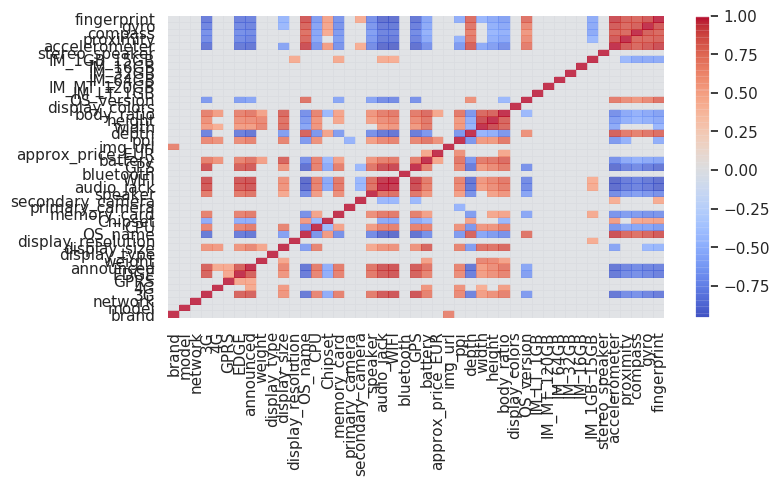

In [0]:
#Gerando matriz de correlação dos dados
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(data.columns, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(data.columns, minor=False)
    plt.tick_params(axis='True', which='True', bottom='True', top='False', left = 'False', right = 'False')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(phones_knn, hurdle=0.5)

In [0]:
#Removeondo as colunas que não tinham correlação forte com o ppi para melhorar a visualização da matriz de correlação
phones_knn = phones_knn[[
            '3G',	'4G', 'EDGE', 'announced', 'weight', 'display_type', 'display_size', 'display_resolution' , 'CPU', 'Chipset', 'memory_card', 'WIFI', 'bluetooth', 'GPS', 'battery', 'approx_price_EUR', 'ppi', 'depth', 'width', 'height', 'body_ratio', 'display_colors', 'accelerometer', 'proximity', 'compass', 'gyro', 'fingerprint',
]]

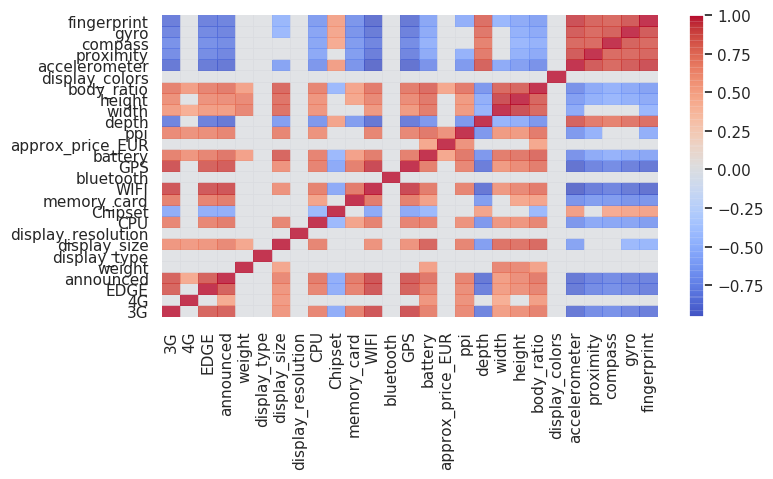

In [0]:
#Gerando novamente a matriz de correlação
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(data.columns, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(data.columns, minor=False)
    plt.tick_params(axis='True', which='True', bottom='True', top='False', left = 'False', right = 'False')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(phones_knn, hurdle=0.5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

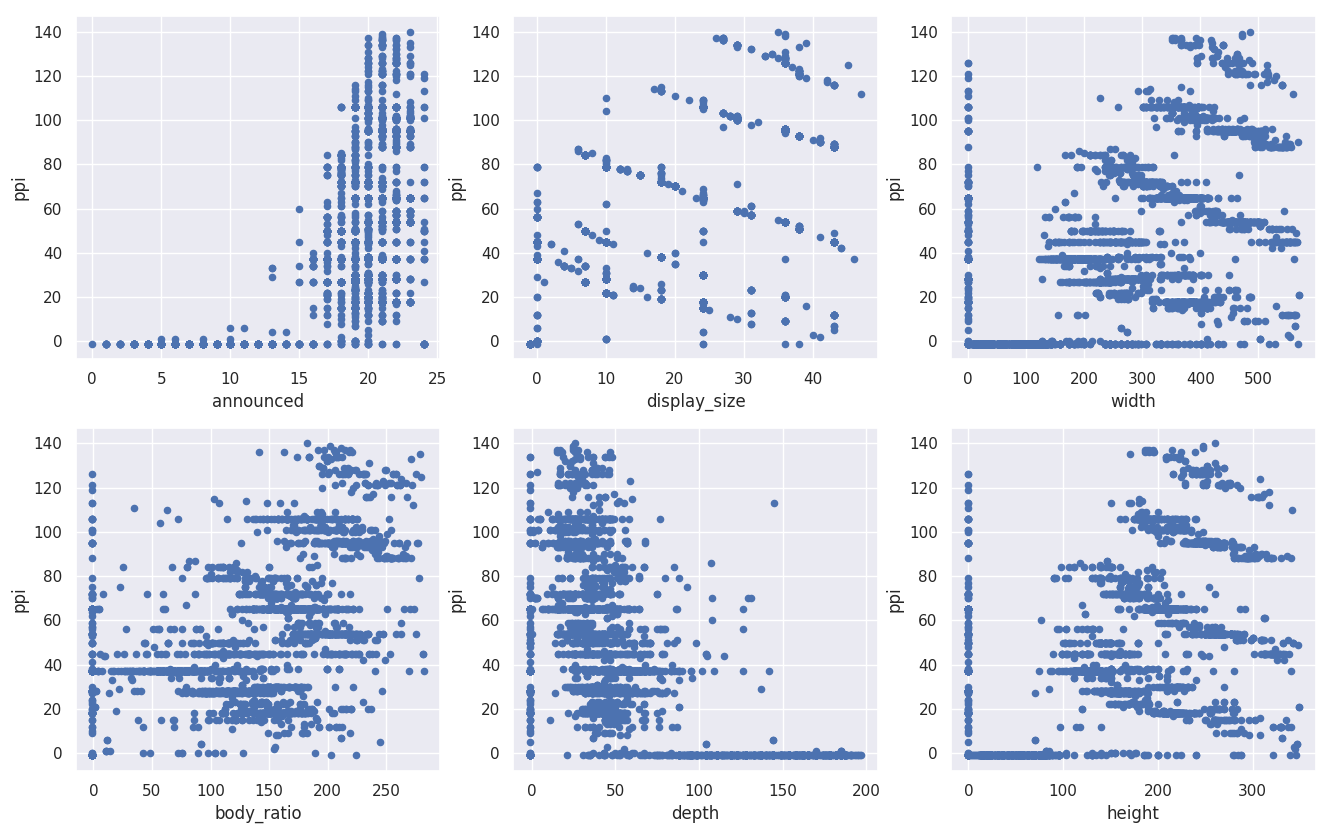

In [0]:
#Gerando alguns gráficos de correlação entre colunas e a coluna de ppi
figs, axes = plt.subplots(2,3,figsize=(16,10))

phones_knn[['announced','ppi']].plot.scatter(x='announced',y='ppi',ax=axes[0,0])
phones_knn[['display_size','ppi']].plot.scatter(x='display_size',y='ppi',ax=axes[0,1])
phones_knn[['width','ppi']].plot.scatter(x='width',y='ppi',ax=axes[0,2])
phones_knn[['body_ratio','ppi']].plot.scatter(x='body_ratio',y='ppi',ax=axes[1,0])
phones_knn[['depth','ppi']].plot.scatter(x='depth',y='ppi',ax=axes[1,1])
phones_knn[['height','ppi']].plot.scatter(x='height',y='ppi',ax=axes[1,2])

**Linear Regression**

In [0]:
#Criando uma cópia do dataset com as features de maior correlação com o 'ppi'
phones_regression = phones_knn[['announced', 'display_size', 'body_ratio', 'ppi']]
phones_regression.head()

,announced,display_size,body_ratio,ppi
1,22,36,215,95
2,22,24,-1,65
4,21,36,188,54
5,22,36,-1,95
6,22,36,201,54


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(phones_regression.iloc[:, 0:3], phones_regression[['ppi']])

print('y = {:.3f} {:+.3f}x1 {:+.3f}x2 {:+.3f}x3'\
           .format(model.intercept_[0], model.coef_[0,0], model.coef_[0,1], model.coef_[0,2]))

y = -16.792 +1.959x1 +0.520x2 +0.156x3


R2:      0.644
MSE:     465.968


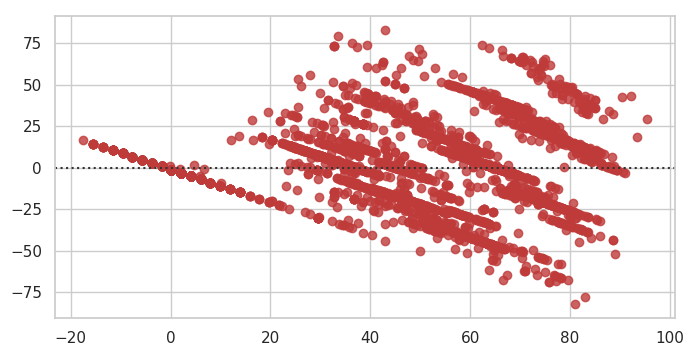

In [0]:
predict = model.predict(phones_regression.iloc[:, 0:3])

mse = mean_squared_error(phones_regression[['ppi']], predict)
r2 = r2_score(phones_regression[['ppi']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))

sns.set(style="whitegrid")
sns.residplot(predict, phones_regression[['ppi']], color="#BF3B3A")

R2:      0.644
MSE:     465.968


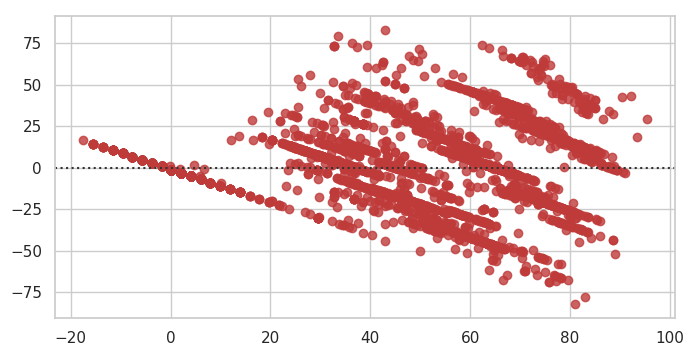

In [0]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

columns = ['announced', 'display_size', 'body_ratio']

model.fit(phones_regression[columns], phones_regression[['ppi']])

predict = model.predict(phones_regression[columns])

mse = mean_squared_error(phones_regression[['ppi']], predict)
r2 = r2_score(phones_regression[['ppi']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))

sns.set(style="whitegrid")
sns.residplot(predict, phones_regression[['ppi']], color="#BF3B3A")

Vimos que o valor de score ainda estava abaixo do desejado, representando um alto valor de viés, então para melhorá-lo decidimos adicionar mais **features** ao modelo, para isso plotamos os gráficos de correlação de todas as colunas com ppi, para ter uma melhor visualização da correlação dos dados



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

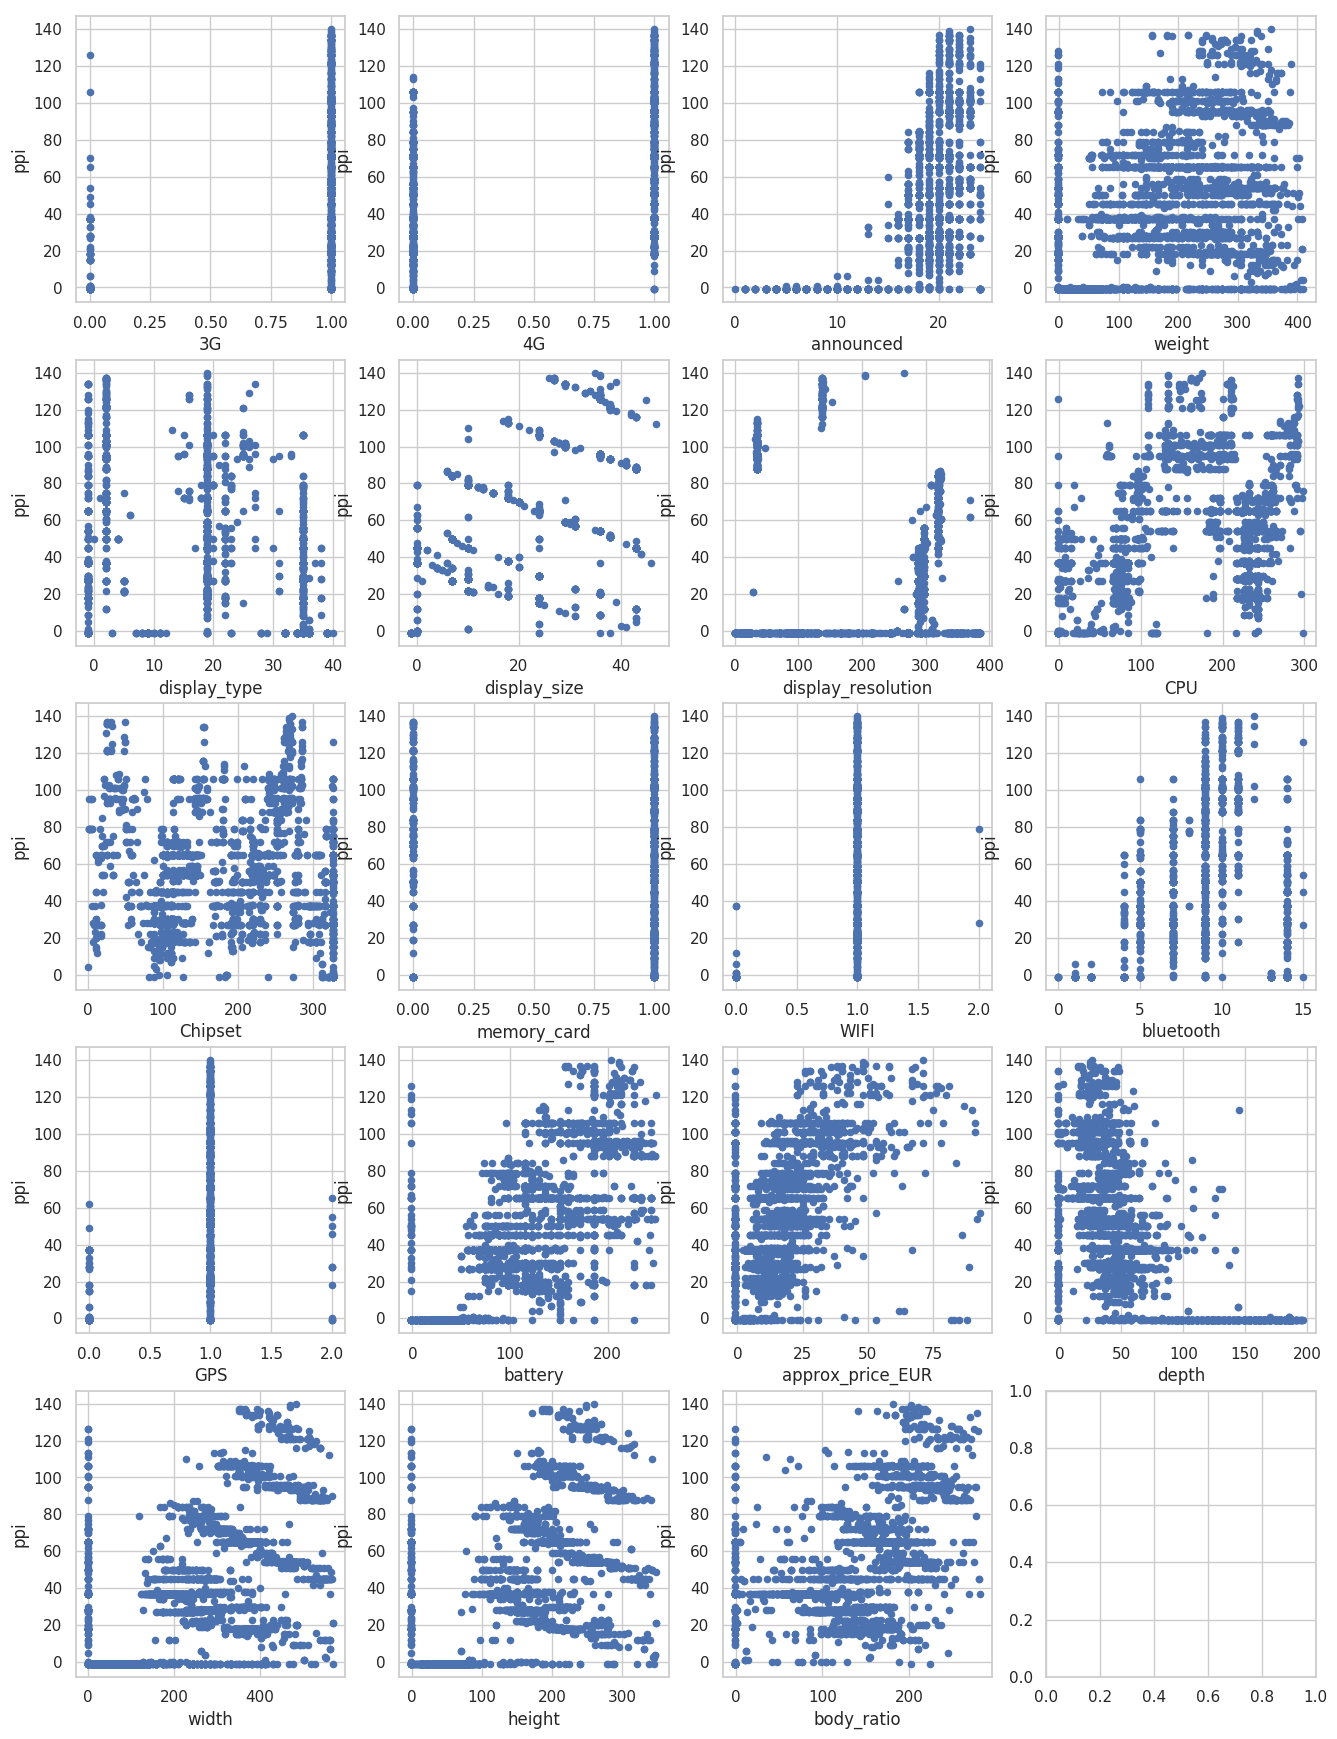

In [0]:
figs, axes = plt.subplots(5,4,figsize=(16,22))

phones_knn[['3G','ppi']].plot.scatter(x='3G',y='ppi',ax=axes[0,0])
phones_knn[['4G','ppi']].plot.scatter(x='4G',y='ppi',ax=axes[0,1])
phones_knn[['announced','ppi']].plot.scatter(x='announced',y='ppi',ax=axes[0,2])
phones_knn[['weight','ppi']].plot.scatter(x='weight',y='ppi',ax=axes[0,3])
phones_knn[['display_type','ppi']].plot.scatter(x='display_type',y='ppi',ax=axes[1,0])
phones_knn[['display_size','ppi']].plot.scatter(x='display_size',y='ppi',ax=axes[1,1])
phones_knn[['display_resolution','ppi']].plot.scatter(x='display_resolution',y='ppi',ax=axes[1,2])
phones_knn[['CPU','ppi']].plot.scatter(x='CPU',y='ppi',ax=axes[1,3])
phones_knn[['Chipset','ppi']].plot.scatter(x='Chipset',y='ppi',ax=axes[2,0])
phones_knn[['memory_card','ppi']].plot.scatter(x='memory_card',y='ppi',ax=axes[2,1])
phones_knn[['WIFI','ppi']].plot.scatter(x='WIFI',y='ppi',ax=axes[2,2])
phones_knn[['bluetooth','ppi']].plot.scatter(x='bluetooth',y='ppi',ax=axes[2,3])
phones_knn[['GPS','ppi']].plot.scatter(x='GPS',y='ppi',ax=axes[3,0])
phones_knn[['battery','ppi']].plot.scatter(x='battery',y='ppi',ax=axes[3,1])
phones_knn[['approx_price_EUR','ppi']].plot.scatter(x='approx_price_EUR',y='ppi',ax=axes[3,2])
phones_knn[['depth','ppi']].plot.scatter(x='depth',y='ppi',ax=axes[3,3])
phones_knn[['width','ppi']].plot.scatter(x='width',y='ppi',ax=axes[4,0])
phones_knn[['height','ppi']].plot.scatter(x='height',y='ppi',ax=axes[4,1])
phones_knn[['body_ratio','ppi']].plot.scatter(x='body_ratio',y='ppi',ax=axes[4,2])

In [0]:
#Features escolhidas para serem usadas no modelo
phones_regression_2 = phones_knn[['announced', 'weight', 'display_resolution', 'battery', 'approx_price_EUR', 'depth', 'width', 'height', 'body_ratio', 'ppi']]
phones_regression_2.head()

,announced,weight,display_resolution,battery,approx_price_EUR,depth,width,height,body_ratio,ppi
1,22,304,35,233,23,32,466,246,215,95
2,22,-1,319,115,10,-1,-1,-1,-1,65
4,21,291,319,229,21,32,461,278,188,54
5,22,-1,35,-1,-1,-1,-1,-1,-1,95
6,22,-1,319,244,18,48,468,260,201,54


R2:      0.777
MSE:     291.276


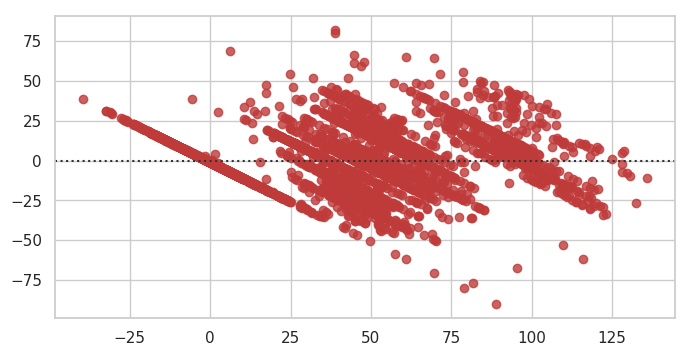

In [0]:
#Gerando novamente o modelo com as novas features
from sklearn.linear_model import LinearRegression
model = LinearRegression()

columns = ['announced', 'weight', 'display_resolution', 'battery', 'approx_price_EUR', 'depth', 'width', 'height', 'body_ratio']

model.fit(phones_regression_2[columns], phones_regression_2[['ppi']])

predict = model.predict(phones_regression_2[columns])

mse = mean_squared_error(phones_regression_2[['ppi']], predict)
r2 = r2_score(phones_regression_2[['ppi']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))

sns.set(style="whitegrid")
sns.residplot(predict, phones_regression_2[['ppi']], color="#BF3B3A")

**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestRegressor

([<matplotlib.axis.XTick at 0x7ffb03a796a0>,
 <a list of 9 Text xticklabel objects>)

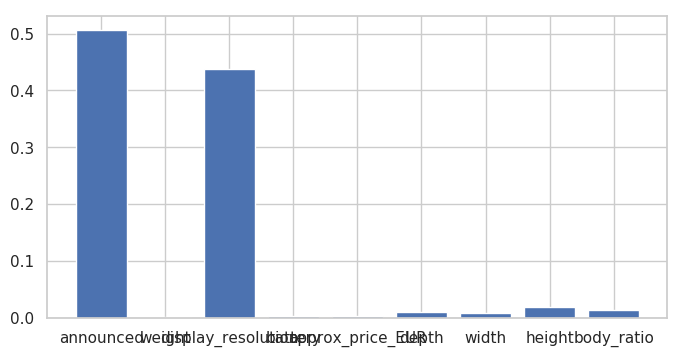

In [0]:
regr = RandomForestRegressor()
regr.fit(phones_regression_2.iloc[:, 0:9].values, phones_regression_2[['ppi']].values.reshape(phones_regression_2[['ppi']].shape[0],))

plt.bar(np.arange(1, 10), regr.feature_importances_)
plt.xticks(np.arange(1, 10), phones_regression_2.columns)

R2:      0.997
MSE:     4.180


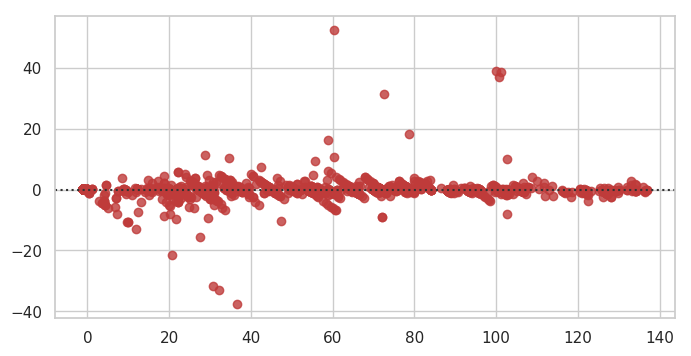

In [0]:
predict = regr.predict(phones_regression_2.iloc[:, 0:9])

mse = mean_squared_error(phones_regression_2[['ppi']], predict)
r2 = r2_score(phones_regression_2[['ppi']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))

sns.set(style="whitegrid")
sns.residplot(predict, phones_regression_2[['ppi']], color="#BF3B3A")

**Alterando valores dos hiperparâmetros no Random Forest**

*   n_estimators = number of trees in the foreset
*   max_features = max number of features considered for splitting a node
*   max_depth = max number of levels in each decision tree





([<matplotlib.axis.XTick at 0x7ffb039d1a58>,
 <a list of 9 Text xticklabel objects>)

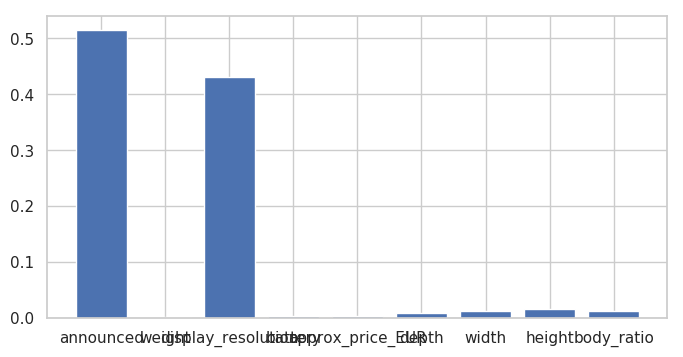

In [0]:
regr = RandomForestRegressor(n_estimators=100, max_features=9, max_depth=40)
regr.fit(phones_regression_2.iloc[:, 0:9].values, phones_regression_2[['ppi']].values.reshape(phones_regression_2[['ppi']].shape[0],))

plt.bar(np.arange(1, 10), regr.feature_importances_)
plt.xticks(np.arange(1, 10), phones_regression_2.columns)

R2:      0.998
MSE:     3.137


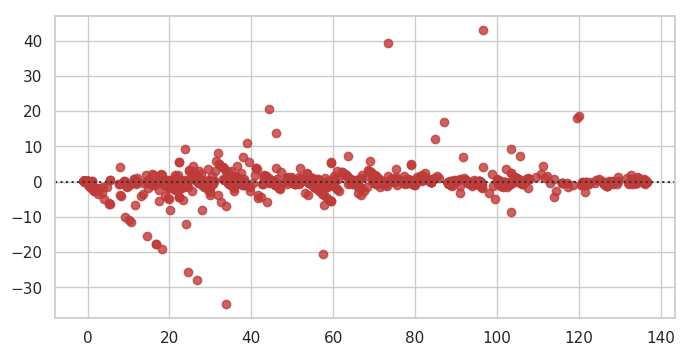

In [0]:
predict = regr.predict(phones_regression_2.iloc[:, 0:9])

mse = mean_squared_error(phones_regression_2[['ppi']], predict)
r2 = r2_score(phones_regression_2[['ppi']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))

sns.set(style="whitegrid")
sns.residplot(predict, phones_regression_2[['ppi']], color="#BF3B3A")

**Hist Gradient Boosting Regressor**


In [0]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

R2:       0.993
MSE:      8.809


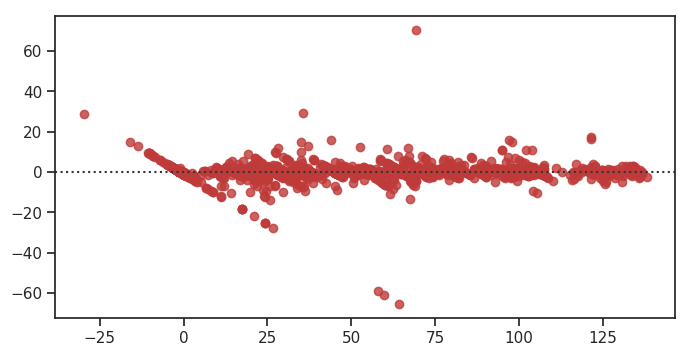

In [0]:
regr = HistGradientBoostingRegressor()
regr.fit(phones_regression_2.iloc[:, 0:9].values, phones_regression_2[['ppi']].values.reshape(phones_regression_2[['ppi']].shape[0],))

predict = regr.predict(phones_regression_2.iloc[:, 0:9])
sns.set(style="ticks")
sns.residplot(predict, phones_regression_2[['ppi']], color="#BF3B3A")

mse = mean_squared_error(phones_regression_2[['ppi']], predict)
r2 = r2_score(phones_regression_2[['ppi']], predict)

print(f"R2:       {r2:.3f}")
print(f"MSE:      {mse:.3f}")

**Gradient Boosting Regressor**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor()
regr.fit(phones_regression_2.iloc[:, 0:9].values, phones_regression_2[['ppi']].values.reshape(phones_regression_2[['ppi']].shape[0],))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2: 0.985
MSE: 19.371


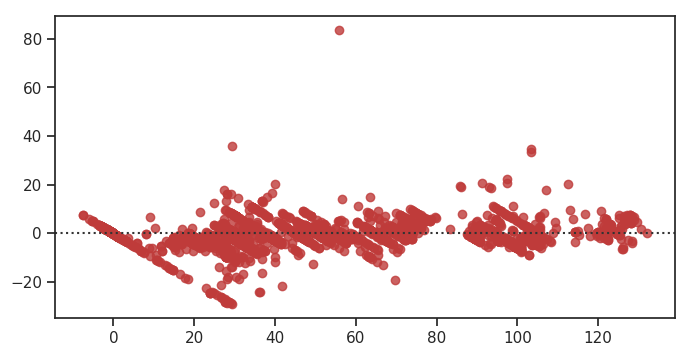

In [0]:
predict = regr.predict(phones_regression_2.iloc[:, 0:9])

sns.set(style="ticks")
sns.residplot(predict, phones_regression_2[['ppi']], color="#BF3B3A")

mse = mean_squared_error(phones_regression_2[['ppi']], predict)
r2 = r2_score(phones_regression_2[['ppi']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")

**Alterando valores dos hiperparâmetros no Gradient Boosting Regressor**

*   n_estimators = number of trees in the foreset
*   max_features = max number of features considered for splitting a node
*   max_depth = max number of levels in each decision tree

In [0]:
regr = GradientBoostingRegressor(n_estimators=100, max_features=9, max_depth=40)
regr.fit(phones_regression_2.iloc[:, 0:9].values, phones_regression_2[['ppi']].values.reshape(phones_regression_2[['ppi']].shape[0],))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=40,
                          max_features=9, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2: 1.000
MSE: 0.112


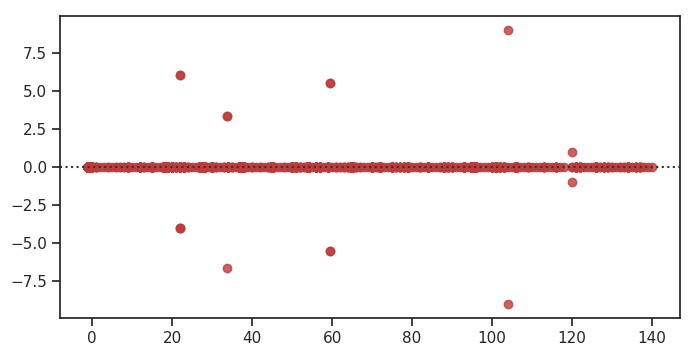

In [0]:
predict = regr.predict(phones_regression_2.iloc[:, 0:9])

sns.set(style="ticks")
sns.residplot(predict, phones_regression_2[['ppi']], color="#BF3B3A")

mse = mean_squared_error(phones_regression_2[['ppi']], predict)
r2 = r2_score(phones_regression_2[['ppi']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")

**Tentativa de realizar o hold-out**

In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [0]:
columns = "weight display_resolution battery approx_price_EUR depth width height body_ratio".split() 

y = phones_regression_2.ppi

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(phones_regression_2, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(3365, 10) (3365,)
(842, 10) (842,)


In [0]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [0]:
predictions[0:5]

array([ 45.,  37.,  -1., 103.,  54.])

1.0


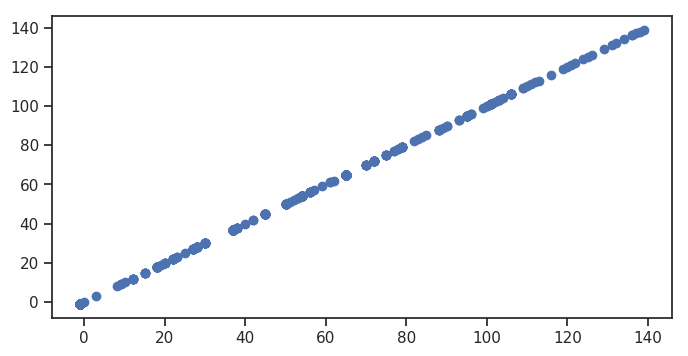

In [0]:
print(model.score(X_test, y_test))
plt.scatter(y_test, predictions)

In [0]:
from sklearn.model_selection import KFold 

x = "weight approx_price_EUR depth width height body_ratio".split() 
y = phones_regression_2['ppi']

kf = KFold(n_splits=6) 

KFold(n_splits=6, random_state=None, shuffle=False)

KFold(n_splits=6, random_state=None, shuffle=False)

In [0]:
for train_index, test_index in kf.split(x):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3 4 5] TEST: [0]


TypeError: ignored